In [ ]:
import numpy as np
import random

# Define MDP parameters for a 5x5 grid
grid_size = 5
states = range(grid_size * grid_size)  # Total of 25 states (0 to 24)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9  # Discount factor
rewards = np.zeros(len(states))
rewards[24] = 1  # Reward of 1 at the goal state (bottom-right corner)

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If action is out of bounds, remain in the same state

# Initialize a value table
V = np.zeros(len(states))
threshold = 1e-4


In [ ]:
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration
V = value_iteration(V, states, actions, gamma, threshold)

# Derive policy based on value function
policy = {}
for s in states:
    action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
    policy[s] = max(action_values, key=action_values.get)

print("Optimal Value Function:")
print(V.reshape((grid_size, grid_size)))
print("\nOptimal Policy:")
for s in states:
    print(f"State {s}: {policy[s]}")


Optimal Value Function:
[[4.30391033 4.78220723 5.31364823 5.90413823 6.56023823]
 [4.78220723 5.31364823 5.90413823 6.56023823 7.28923823]
 [5.31364823 5.90413823 6.56023823 7.28923823 8.09923823]
 [5.90413823 6.56023823 7.28923823 8.09923823 8.99923823]
 [6.56023823 7.28923823 8.09923823 8.99923823 9.99923823]]

Optimal Policy:
State 0: down
State 1: down
State 2: down
State 3: down
State 4: down
State 5: down
State 6: down
State 7: down
State 8: down
State 9: down
State 10: down
State 11: down
State 12: down
State 13: down
State 14: down
State 15: down
State 16: down
State 17: down
State 18: down
State 19: down
State 20: right
State 21: right
State 22: right
State 23: right
State 24: down


In [ ]:
# Q-learning parameters
alpha = 0.1      # Learning rate
epsilon = 0.1    # Exploration rate
episodes = 1000  # Total episodes

# Initialize Q-table
Q = np.zeros((len(states), len(actions)))

# Q-learning Algorithm
for episode in range(episodes):
    state = random.choice(states)
    while state != 24:  # Loop until reaching goal state
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q[state])]
        next_state = transition(state, action)
        reward = rewards[next_state]

        # Q-value update
        Q[state, actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, actions.index(action)])
        state = next_state

# Derive policy based on Q-values
policy = {s: actions[np.argmax(Q[s])] for s in states}

print("Optimal Q-values:")
print(Q)
print("\nOptimal Policy from Q-learning:")
for s in policy:
    print(f"State {s}: {policy[s]}")


Optimal Q-values:
[[1.15927056e-01 1.49841423e-01 1.48035178e-01 4.78296891e-01]
 [3.03752234e-01 2.94194900e-01 2.01631334e-01 5.31441000e-01]
 [4.22042565e-01 4.21228439e-01 3.69683298e-01 5.90490000e-01]
 [4.68620829e-01 3.25934028e-01 4.40144494e-01 6.56100000e-01]
 [5.29220853e-01 7.29000000e-01 4.05164253e-01 5.60259376e-01]
 [4.30465402e-01 5.94061171e-02 1.33129391e-01 1.47756487e-01]
 [4.78296765e-01 3.86421979e-02 1.13311829e-01 1.07324588e-01]
 [5.31440553e-01 7.40476049e-08 8.17886317e-02 1.87733892e-01]
 [5.90211604e-01 2.18878559e-01 2.33580350e-01 2.46397220e-01]
 [6.03729324e-01 8.10000000e-01 4.82460090e-01 6.60157387e-01]
 [3.87351586e-01 1.16990933e-01 8.46371978e-02 3.86686199e-02]
 [4.30418598e-01 7.71655869e-02 6.50057406e-02 1.27404822e-02]
 [4.77476238e-01 3.14643243e-02 3.87346516e-02 7.30553277e-02]
 [6.30512998e-02 8.08530786e-01 8.08921370e-02 0.00000000e+00]
 [6.81643116e-01 9.00000000e-01 5.90783118e-01 6.30805656e-01]
 [3.46640304e-01 4.60496552e-02 1.288

In [ ]:
# TD-learning (similar to Q-learning)
for episode in range(episodes):
    state = random.choice(states)
    while state != 24:  # Loop until reaching goal state
        # Epsilon-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q[state])]

        next_state = transition(state, action)
        reward = rewards[next_state]

        # Temporal Difference update
        td_target = reward + gamma * np.max(Q[next_state])
        td_error = td_target - Q[state, actions.index(action)]
        Q[state, actions.index(action)] += alpha * td_error

        state = next_state

# Derive policy based on Q-values after TD-learning
policy = {s: actions[np.argmax(Q[s])] for s in states}

print("Optimal Q-values after TD-learning:")
print(Q)
print("\nOptimal Policy from Q-learning with Temporal Difference:")
for s in policy:
    print(f"State {s}: {policy[s]}")


Optimal Q-values after TD-learning:
[[0.24473439 0.24713238 0.24516355 0.4782969 ]
 [0.43392999 0.40240995 0.30885444 0.531441  ]
 [0.4890578  0.4561874  0.44042568 0.59049   ]
 [0.57219809 0.4891037  0.50823465 0.6561    ]
 [0.63258904 0.729      0.57223966 0.65052689]
 [0.43046721 0.13779828 0.29875465 0.28022314]
 [0.4782969  0.15858676 0.22556206 0.20785808]
 [0.531441   0.20164956 0.11665648 0.25303292]
 [0.59048976 0.26986348 0.31773834 0.37718257]
 [0.65094269 0.81       0.52547679 0.71751899]
 [0.38742049 0.15426166 0.11104129 0.13317945]
 [0.43046721 0.12875217 0.11890355 0.15638757]
 [0.47829684 0.06701136 0.07360323 0.19765328]
 [0.0630513  0.80999707 0.11584876 0.1539    ]
 [0.72676943 0.9        0.71665664 0.7957063 ]
 [0.34867827 0.12641608 0.0606278  0.09132572]
 [0.38742034 0.17442546 0.16029823 0.08519356]
 [0.43023475 0.06336693 0.08597007 0.        ]
 [0.42328711 0.46735465 0.19802601 0.9       ]
 [0.80740428 1.         0.80439434 0.89484622]
 [0.31360093 0.         

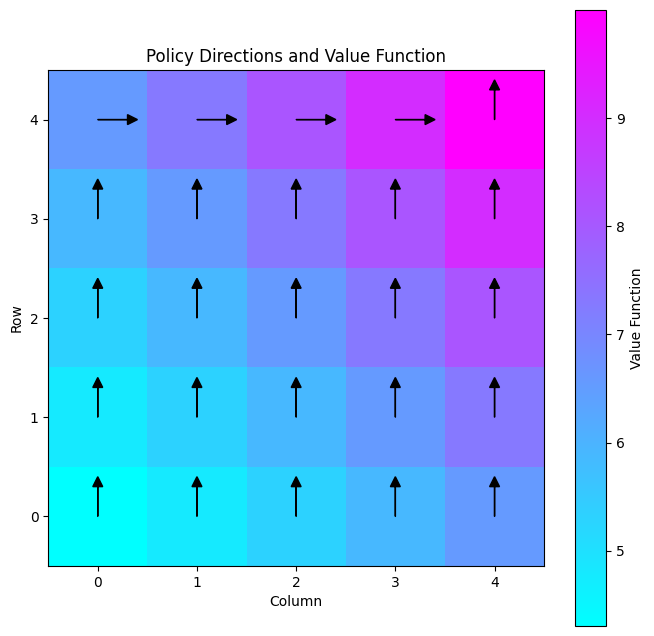

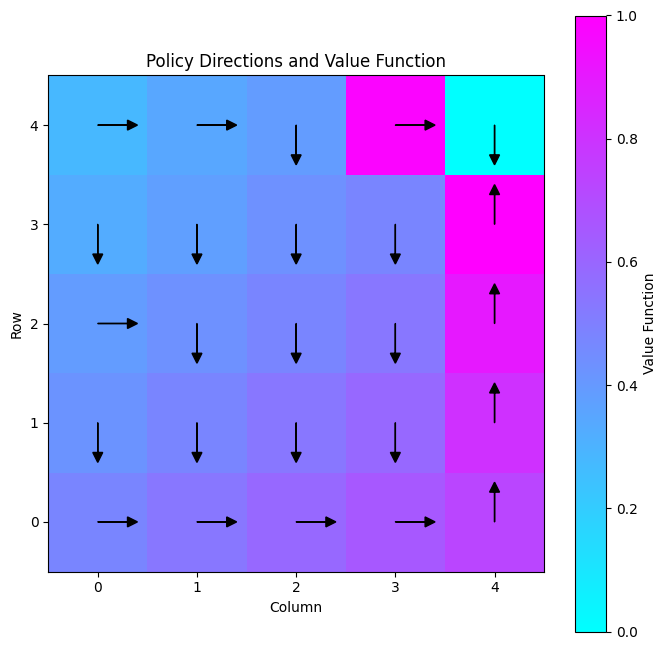

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9
rewards = np.zeros(len(states))
rewards[24] = 1  # Reward of 1 at the goal state

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If out of bounds, remain in the same state

# Initialize a value table
V = np.zeros(len(states))
threshold = 1e-4

# Value Iteration with Bellman Update
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold)

# Extract policy based on the value function
policy = {}
for s in states:
    action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
    policy[s] = max(action_values, key=action_values.get)

# Visualization of the Value Function and Policy
def visualize_policy_value(V, policy):
    plt.figure(figsize=(8, 8))
    plt.imshow(V.reshape((grid_size, grid_size)), cmap='cool', interpolation='nearest')
    plt.colorbar(label="Value Function")

    # Display arrows for policy
    for state, action in policy.items():
        row, col = divmod(state, grid_size)
        if action == 'up':
            dx, dy = 0, -0.3
        elif action == 'down':
            dx, dy = 0, 0.3
        elif action == 'left':
            dx, dy = -0.3, 0
        elif action == 'right':
            dx, dy = 0.3, 0
        plt.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    plt.title("Policy Directions and Value Function")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    plt.show()

# Visualize the Value Function and Policy
visualize_policy_value(V, policy)

# Q-Learning Setup
alpha = 0.1
epsilon = 0.1
episodes = 1000
Q = np.zeros((len(states), len(actions)))

# Q-Learning with epsilon-greedy policy
for episode in range(episodes):
    state = random.choice(states)
    while state != 24:  # Goal state
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action = actions[np.argmax(Q[state])]

        next_state = transition(state, action)
        reward = rewards[next_state]
        # Q-value update
        Q[state, actions.index(action)] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, actions.index(action)])
        state = next_state

# Extract policy based on Q-values
policy_q = {s: actions[np.argmax(Q[s])] for s in states}

# Visualize the Q-learning-based Policy and Value Function
visualize_policy_value(Q.max(axis=1), policy_q)


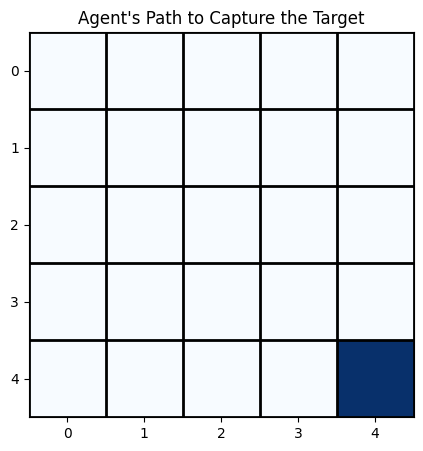

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9
rewards = np.zeros(len(states))
rewards[24] = 1  # Reward of 1 at the goal state (bottom-right corner)

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If out of bounds, remain in the same state

# Initialize a value table
V = np.zeros(len(states))
threshold = 1e-4

# Value Iteration with Bellman Update
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold)

# Extract policy based on the value function
policy = {}
for s in states:
    action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
    policy[s] = max(action_values, key=action_values.get)

# Visualization setup
def visualize_agent_path(policy):
    fig, ax = plt.subplots(figsize=(5, 5))
    grid = np.zeros((grid_size, grid_size))
    grid[-1, -1] = 1  # Mark the goal position

    ax.imshow(grid, cmap="Blues", interpolation="nearest")
    ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # Initialize agent at a random position
    agent_path = [random.choice(states[:-1])]  # Start from any state except the goal

    # Function to update the agent’s position on each frame
    def update(frame):
        state = agent_path[-1]
        if state == 24:  # Stop if at the goal
            return
        action = policy[state]
        next_state = transition(state, action)
        agent_path.append(next_state)

        # Clear previous position markers
        ax.clear()
        ax.imshow(grid, cmap="Blues", interpolation="nearest")
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
        ax.set_xticks(np.arange(-0.5, grid_size, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid_size, 1), minor=True)

        # Plot the path taken by the agent
        for i, pos in enumerate(agent_path):
            row, col = divmod(pos, grid_size)
            ax.text(col, row, '+' if i < len(agent_path) - 1 else '🏁', ha='center', va='center', fontsize=14)

        ax.text(4, 4, '🏁', ha='center', va='center', fontsize=18)  # Goal state marker

    ani = FuncAnimation(fig, update, frames=range(50), repeat=False)
    plt.title("Agent's Path to Capture the Target")
    plt.show()

# Run the visualization
visualize_agent_path(policy)


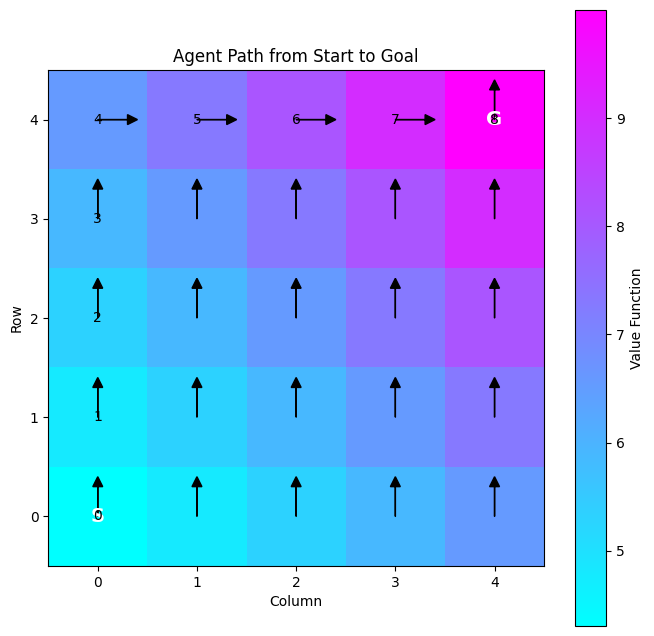

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9
rewards = np.zeros(len(states))
rewards[24] = 1  # Reward of 1 at the goal state

# Define start and goal positions
start_state = 0
goal_state = 24

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If out of bounds, remain in the same state

# Initialize a value table
V = np.zeros(len(states))
threshold = 1e-4

# Value Iteration with Bellman Update
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold)

# Extract policy based on the value function
policy = {}
for s in states:
    action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
    policy[s] = max(action_values, key=action_values.get)

# Path Visualization Function
def visualize_path(policy, start_state, goal_state):
    # Initialize the grid with -1 values
    path_grid = -np.ones((grid_size, grid_size))
    row, col = divmod(goal_state, grid_size)
    path_grid[row, col] = 1  # Mark the goal

    # Generate the path from start to goal using the policy
    path = [start_state]
    state = start_state
    while state != goal_state:
        action = policy[state]
        state = transition(state, action)
        path.append(state)

    # Mark the path states in the grid
    for step, state in enumerate(path):
        row, col = divmod(state, grid_size)
        path_grid[row, col] = step  # Assign step number for visualization

    # Plotting the grid, path, and policy
    plt.figure(figsize=(8, 8))
    plt.imshow(V.reshape((grid_size, grid_size)), cmap='cool', interpolation='nearest')
    plt.colorbar(label="Value Function")
    plt.title("Agent Path from Start to Goal")

    # Overlay the start and goal points
    start_row, start_col = divmod(start_state, grid_size)
    goal_row, goal_col = divmod(goal_state, grid_size)
    plt.text(start_col, start_row, 'S', ha='center', va='center', color='white', fontsize=14, fontweight='bold')
    plt.text(goal_col, goal_row, 'G', ha='center', va='center', color='white', fontsize=14, fontweight='bold')

    # Display arrows for the policy and highlight the path
    for state, action in policy.items():
        row, col = divmod(state, grid_size)
        dx, dy = 0, 0
        if action == 'up': dy = -0.3
        elif action == 'down': dy = 0.3
        elif action == 'left': dx = -0.3
        elif action == 'right': dx = 0.3
        plt.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Mark path cells with a distinct color
    for step, state in enumerate(path):
        row, col = divmod(state, grid_size)
        plt.text(col, row, str(step), ha='center', va='center', color='black')

    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    plt.show()

# Visualize the path from start to goal
visualize_path(policy, start_state, goal_state)


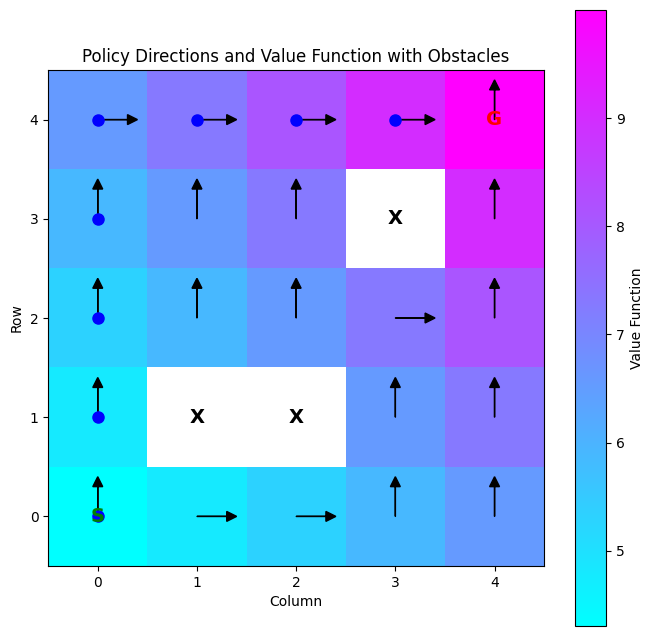

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9
rewards = np.zeros(len(states))
rewards[24] = 1  # Reward of 1 at the goal state

# Define obstacles
obstacles = {6, 7, 18}  # Example obstacles at positions 6, 7, and 18
for obs in obstacles:
    rewards[obs] = None  # Obstacle states have 'None' as reward

# Define state transitions with obstacle avoidance
def transition(state, action):
    row, col = divmod(state, grid_size)
    if state in obstacles:
        return state  # Remain in place if it's an obstacle
    if action == 'up' and row > 0 and state - grid_size not in obstacles:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1 and state + grid_size not in obstacles:
        return state + grid_size
    elif action == 'left' and col > 0 and state - 1 not in obstacles:
        return state - 1
    elif action == 'right' and col < grid_size - 1 and state + 1 not in obstacles:
        return state + 1
    return state  # Remain in the same state if action is out of bounds or blocked

# Initialize value table
V = np.zeros(len(states))
threshold = 1e-4

# Value Iteration with Bellman Update, ignoring obstacle states
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            if s in obstacles:
                continue  # Skip obstacles in value iteration
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] if rewards[s] is not None else 0 for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold)

# Extract policy based on the value function
policy = {}
for s in states:
    if s in obstacles:
        continue
    action_values = {a: rewards[s] + gamma * V[transition(s, a)] if rewards[s] is not None else 0 for a in actions}
    policy[s] = max(action_values, key=action_values.get)

# Visualization function with start, goal, obstacles, and path tracking
def visualize_policy_value(V, policy, start, goal):
    V_grid = V.reshape((grid_size, grid_size)).copy()
    for obs in obstacles:
        V_grid[obs // grid_size, obs % grid_size] = None  # Mark obstacles with None

    plt.figure(figsize=(8, 8))
    plt.imshow(V_grid, cmap='cool', interpolation='nearest')
    plt.colorbar(label="Value Function")

    # Display obstacles, start, and goal
    for row in range(grid_size):
        for col in range(grid_size):
            state = row * grid_size + col
            if state == start:
                plt.text(col, row, 'S', ha='center', va='center', color='green', fontsize=14, fontweight='bold')
            elif state == goal:
                plt.text(col, row, 'G', ha='center', va='center', color='red', fontsize=14, fontweight='bold')
            elif state in obstacles:
                plt.text(col, row, 'X', ha='center', va='center', color='black', fontsize=14, fontweight='bold')

    # Display arrows for policy
    for state, action in policy.items():
        row, col = divmod(state, grid_size)
        if state in obstacles:
            continue
        if action == 'up':
            dx, dy = 0, -0.3
        elif action == 'down':
            dx, dy = 0, 0.3
        elif action == 'left':
            dx, dy = -0.3, 0
        elif action == 'right':
            dx, dy = 0.3, 0
        plt.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Trace the path from start to goal
    path = []
    current = start
    while current != goal and current not in obstacles:
        path.append(current)
        action = policy.get(current, None)
        if action is None:
            break
        next_state = transition(current, action)
        if next_state == current:  # If stuck due to obstacle or boundary, exit
            break
        current = next_state

    # Display the path
    for state in path:
        row, col = divmod(state, grid_size)
        plt.plot(col, row, 'o', color='blue', markersize=8)

    plt.title("Policy Directions and Value Function with Obstacles")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    plt.show()

# Visualize the Value Function, Policy, Start, Goal, Obstacles, and Path
start_state = 0  # Start at top-left corner
goal_state = 24  # Goal at bottom-right corner
visualize_policy_value(V, policy, start_state, goal_state)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9

# Define the special states
start_state = 0
goal_state = 24
obstacles = [6, 12, 18]  # Obstacles that block the agent
neutral_points = [10, 14]  # Neutral cells with no reward impact

# Set rewards for all states: +1 for goal, -1 for obstacles, 0 for neutral points
rewards = np.zeros(len(states))
rewards[goal_state] = 1
for obs in obstacles:
    rewards[obs] = -1

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If out of bounds or obstacle, remain in the same state

# Initialize value table
V = np.zeros(len(states))
threshold = 1e-4

# Value Iteration with Bellman Update
def value_iteration(V, states, actions, gamma, threshold):
    while True:
        delta = 0
        for s in states:
            if s in obstacles or s == goal_state:
                continue  # Skip updating for obstacles and goal
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold)

# Extract policy based on the value function
policy = {}
for s in states:
    if s in obstacles or s == goal_state:
        policy[s] = None
    else:
        action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
        policy[s] = max(action_values, key=action_values.get)

# Visualization of the Value Function, Policy, and Path
def visualize_grid(V, policy, path=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(V.reshape((grid_size, grid_size)), cmap='cool', interpolation='nearest')
    plt.colorbar(label="Value Function")

    # Mark start, goal, obstacles, and neutral points
    for state in states:
        row, col = divmod(state, grid_size)
        if state == start_state:
            plt.text(col, row, 'Start', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        elif state == goal_state:
            plt.text(col, row, 'Goal', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        elif state in obstacles:
            plt.text(col, row, 'X', ha='center', va='center', color='red', fontsize=16, fontweight='bold')
        elif state in neutral_points:
            plt.text(col, row, 'O', ha='center', va='center', color='gray', fontsize=16, fontweight='bold')

    # Display arrows for policy (ignore obstacles and goal state)
    for state, action in policy.items():
        if action is None or state in obstacles or state == goal_state:
            continue
        row, col = divmod(state, grid_size)
        if action == 'up':
            dx, dy = 0, -0.3
        elif action == 'down':
            dx, dy = 0, 0.3
        elif action == 'left':
            dx, dy = -0.3, 0
        elif action == 'right':
            dx, dy = 0.3, 0
        plt.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Plot the path if provided
    if path:
        for i in range(len(path) - 1):
            current_state = path[i]
            next_state = path[i + 1]
            curr_row, curr_col = divmod(current_state, grid_size)
            next_row, next_col = divmod(next_state, grid_size)
            plt.plot([curr_col, next_col], [curr_row, next_row], 'bo-', markersize=5)

    plt.title("5x5 Grid - Policy, Obstacles, Start & Goal")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    plt.show()

# Generate a sample path based on the policy
def generate_path(policy, start, goal):
    path = [start]
    current = start
    while current != goal:
        action = policy[current]
        if action is None:
            break
        next_state = transition(current, action)
        path.append(next_state)
        current = next_state
    return path

# Generate path from start to goal
path = generate_path(policy, start_state, goal_state)

# Visualize the Value Function, Policy, and Path
visualize_grid(V, policy, path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Set up the 5x5 grid MDP parameters
grid_size = 5
states = range(grid_size * grid_size)
actions = ['up', 'down', 'left', 'right']
gamma = 0.9

# Define the special states
start_state = 0
goal_state = 24
obstacles = [6, 12, 18]  # Obstacles that block the agent
neutral_points = [10, 14]  # Neutral cells with no reward impact

# Set rewards for all states: +1 for goal, -1 for obstacles, 0 for neutral points
rewards = np.zeros(len(states))
rewards[goal_state] = 1
for obs in obstacles:
    rewards[obs] = -1

# Define state transitions
def transition(state, action):
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        return state - grid_size
    elif action == 'down' and row < grid_size - 1:
        return state + grid_size
    elif action == 'left' and col > 0:
        return state - 1
    elif action == 'right' and col < grid_size - 1:
        return state + 1
    return state  # If out of bounds, remain in the same state

# Initialize value table
V = np.zeros(len(states))
threshold = 1e-2  # Increased threshold for faster convergence
max_iterations = 1000  # Set a limit on the number of iterations

# Value Iteration with Bellman Update
def value_iteration(V, states, actions, gamma, threshold, max_iterations):
    for i in range(max_iterations):
        delta = 0
        for s in states:
            if s in obstacles or s == goal_state:
                continue  # Skip updating for obstacles and goal
            v = V[s]
            V[s] = max([rewards[s] + gamma * V[transition(s, a)] for a in actions])
            delta = max(delta, abs(v - V[s]))
        if delta < threshold:
            print(f"Converged after {i+1} iterations.")
            break
    return V

# Run value iteration to get the optimal value function
V = value_iteration(V, states, actions, gamma, threshold, max_iterations)

# Extract policy based on the value function
policy = {}
for s in states:
    if s in obstacles or s == goal_state:
        policy[s] = None
    else:
        action_values = {a: rewards[s] + gamma * V[transition(s, a)] for a in actions}
        policy[s] = max(action_values, key=action_values.get)

# Visualization of the Value Function, Policy, and Path
def visualize_grid(V, policy, path=None):
    plt.figure(figsize=(8, 8))
    plt.imshow(V.reshape((grid_size, grid_size)), cmap='cool', interpolation='nearest')
    plt.colorbar(label="Value Function")

    # Mark start, goal, obstacles, and neutral points
    for state in states:
        row, col = divmod(state, grid_size)
        if state == start_state:
            plt.text(col, row, 'Start', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        elif state == goal_state:
            plt.text(col, row, 'Goal', ha='center', va='center', color='white', fontsize=12, fontweight='bold')
        elif state in obstacles:
            plt.text(col, row, 'X', ha='center', va='center', color='red', fontsize=16, fontweight='bold')
        elif state in neutral_points:
            plt.text(col, row, 'O', ha='center', va='center', color='gray', fontsize=16, fontweight='bold')

    # Display arrows for policy (ignore obstacles and goal state)
    for state, action in policy.items():
        if action is None or state in obstacles or state == goal_state:
            continue
        row, col = divmod(state, grid_size)
        if action == 'up':
            dx, dy = 0, -0.3
        elif action == 'down':
            dx, dy = 0, 0.3
        elif action == 'left':
            dx, dy = -0.3, 0
        elif action == 'right':
            dx, dy = 0.3, 0
        plt.arrow(col, row, dx, dy, head_width=0.1, head_length=0.1, fc='black', ec='black')

    # Plot the path if provided
    if path:
        for i in range(len(path) - 1):
            current_state = path[i]
            next_state = path[i + 1]
            curr_row, curr_col = divmod(current_state, grid_size)
            next_row, next_col = divmod(next_state, grid_size)
            plt.plot([curr_col, next_col], [curr_row, next_row], 'bo-', markersize=5)

    plt.title("5x5 Grid - Policy, Obstacles, Start & Goal")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.gca().invert_yaxis()
    plt.show()

# Generate a sample path based on the policy
def generate_path(policy, start, goal):
    path = [start]
    current = start
    while current != goal:
        action = policy[current]
        if action is None:
            break
        next_state = transition(current, action)
        path.append(next_state)
        current = next_state
    return path

# Generate path from start to goal
path = generate_path(policy, start_state, goal_state)

# Visualize the Value Function, Policy, and Path
visualize_grid(V, policy, path)


Converged after 1 iterations.
